In [10]:
from pyspedas.utilities.dailynames import dailynames
from pyspedas.utilities.download import download
from pyspedas.analysis.time_clip import time_clip as tclip
from pyspedas import time_double
from pytplot import cdf_to_tplot
from pytplot import store_data
import os
import urllib.request
import numpy as np

trange = ['2014-01-10', '2014-01-12']

remote_name_prefix = 'https://akebono-vlf.db.kanazawa-u.ac.jp/permalink.php?keyword='
pathformat = 'https://akebono-vlf.db.kanazawa-u.ac.jp/permalink.php?keyword=ak_h1_mca_%Y%m%d_v02.cdf'

remote_names = dailynames(file_format=pathformat, trange=trange)

out_files = []

pathname = './Akebono_mca_data_test/'


try:
    os.mkdir(pathname)
except:
    pass

for remote_name in remote_names:                           
    get_data = urllib.request.urlopen(remote_name).read()

    save_name = pathname + remote_name 
    save_name = save_name.replace(remote_name_prefix, '')

    with open(save_name, mode="wb") as f:
        f.write(get_data)
        
    out_files.append(save_name)

out_files = sorted(out_files)

print(out_files, save_name)
tvars = cdf_to_tplot(out_files)



['./Akebono_mca_data_test/ak_h1_mca_20140110_v02.cdf', './Akebono_mca_data_test/ak_h1_mca_20140111_v02.cdf'] ./Akebono_mca_data_test/ak_h1_mca_20140111_v02.cdf


02-Jul-22 02:22:03: /usr/local/lib/python3.8/dist-packages/pytplot/MPLPlotter/tplot.py:236: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  this_axis.set_ylim(yrange)



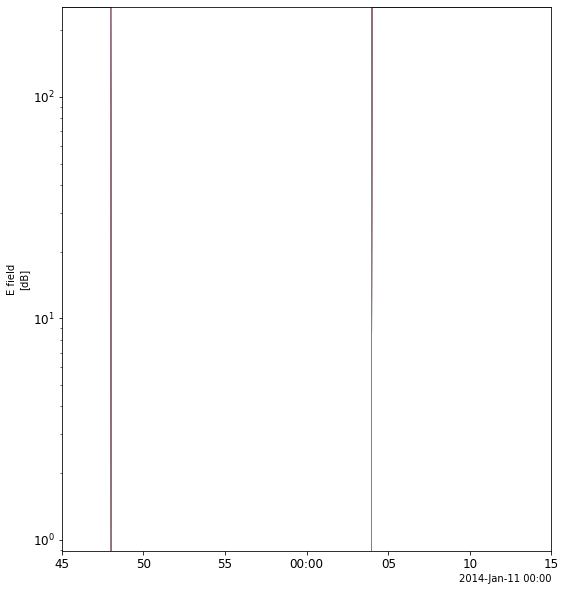

In [17]:
import pytplot
pytplot.tlimit(['2014-01-10 23:59:45', '2014-01-11 00:00:15'])
pytplot.tplot('Emax')